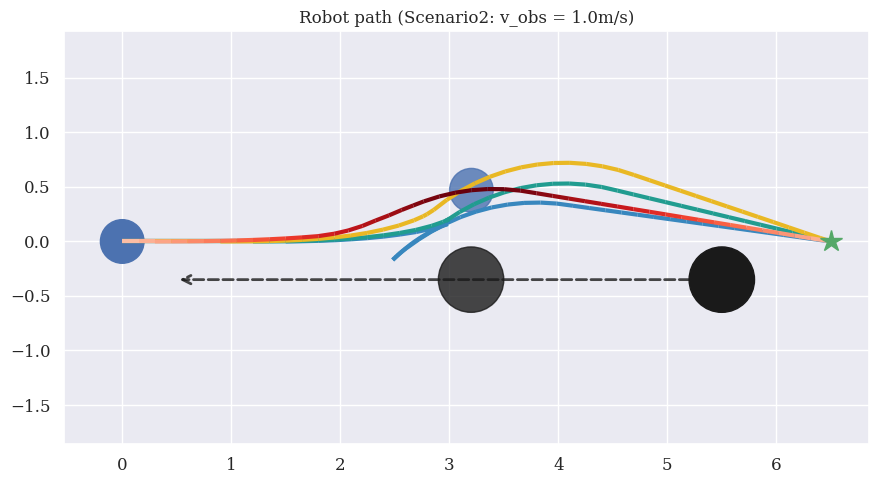

In [28]:
# 绘图
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.font_manager import FontProperties
from matplotlib.patches import FancyArrowPatch


import sys
sys.path.append('/home/pj/jane_ws-github/Demo-Cbf2311/')

import config

font_properties = FontProperties(family='serif', style='normal', weight='normal', size=12)

doc_path = "../results_seaborn/scenario2/"
outfile_name = "Path_comparisons"

color_list = ['#3887BE','#219C90','#E9B824','#D83F31']
controller_list = ["DC", "SCBF", "DCBF", "ACBF"]
plot_size = (9,  5)
label_sign = False

# -----------------------------------------------------------------------------------
sns.set_theme()
fig, axs = plt.subplots(figsize=plot_size)
if label_sign:
    axs.set_xlabel('X(m)', fontproperties=font_properties)
    axs.set_ylabel('Y(m)', fontproperties=font_properties)
plt.xticks(fontproperties=font_properties)
plt.yticks(fontproperties=font_properties)
axs.set_xlim(-1.0, 7.0)
axs.set_ylim(-2, 1.2)
plt.title("Robot path (Scenario2: v_obs = 1.0m/s)", fontproperties=font_properties)
plt.tight_layout()
axs.axis('equal')   

final_data = pd.DataFrame
mindix_index = 0
for i in range(len(controller_list)):
    file_name = "Excel-{}.xlsx".format(controller_list[i])
    file_path = doc_path+file_name
    data = pd.read_excel(file_path)

    ro_x = data['robot_x'].to_numpy()
    ro_y = data['robot_y'].to_numpy()
    ro_dis = data['distance'].to_numpy()

    points = np.array([ro_x, ro_y]).T.reshape(-1,1,2) 
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(ro_dis.min(),ro_dis.max()+1)
    if i < 3:
        lc = LineCollection(segments, color = color_list[i], linewidth = 3, 
                            label=controller_list[i])
    else:
        final_data = data
        mindix_index = np.argmin(ro_dis)
        # print(data.keys())
        # print(mindix_index)
        lc = LineCollection(segments, cmap='Reds_r', norm=norm, linewidth = 3,
                            label=controller_list[i])
    lc.set_array(ro_dis)
    line = axs.add_collection(lc)

# Plot goal
axs.plot(config.goal[0], config.goal[1], 'g*', markersize=16, label="Goal")   

# Plot initial position
axs.add_patch(plt.Circle(config.x0[:2], config.r, color='b', alpha = 1, label="Initial Position"))

# Plot moving obstacle trajectory
if config.moving_obstacles_on is True:
    start_pos = (final_data['obs_x0'].to_numpy()[0], 
                 final_data['obs_y0'].to_numpy()[0])
    end_pos = (final_data['obs_x0'].to_numpy()[-1], 
               final_data['obs_y0'].to_numpy()[-1])
    # plot obstacle path
    arrow = FancyArrowPatch(start_pos, end_pos, mutation_scale=15, arrowstyle='->', 
                            color='k', linestyle='--', label = "Obstacle Path", 
                            linewidth = 2, alpha=0.8)
    axs.add_patch(arrow)
    # plot obstacle position
    cir0 = plt.Circle(start_pos, config.moving_obs[0][4], color='k', alpha=1)
    axs.add_patch(cir0)

    end_pos1 = (final_data['obs_x0'].to_numpy()[mindix_index], 
                final_data['obs_y0'].to_numpy()[mindix_index])
    cir1 = plt.Circle(end_pos1, config.moving_obs[0][4], color='k', alpha=0.8)
    axs.add_patch(cir1)

    end_pos2 = (final_data['robot_x'].to_numpy()[mindix_index], 
                final_data['robot_y'].to_numpy()[mindix_index])
    cir2 = plt.Circle(end_pos2, config.r, color='b', alpha=0.8)
    axs.add_patch(cir2)

# Only show unique legends
if label_sign:
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="lower left", prop=font_properties)
plt.savefig(doc_path+outfile_name+'.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 数据处理
import numpy as np
import pandas as pd

import sys
sys.path.append('/home/pj/jane_ws-github/Demo-Cbf2311/')

import config

doc_path = "../results_seaborn/scenario1/"
controller_list = ["DC", "SCBF", "DCBF", "ACBF"]

# 需要对比的指标：最短距离（轨迹状态），速度变化量，通行时间

for i in range(len(controller_list)):
    file_name = "Excel-{}.xlsx".format(controller_list[i])
    file_path = doc_path+file_name
    data = pd.read_excel(file_path)